### OCNG 669 - HW 8

Plot historical hurricane data.

Load the HURDAT2 data from the [National Hurricane Center](http://www.aoml.noaa.gov/hrd/hurdat/Data_Storm.html). Just so the homework can be submitted correctly, I have included the appropriate file in a `data` subdirectory. You are welcome.

Create a data structure to store this data. We discussed creating a dictionary with the hurricane identifier as the key. The value of this element will itself be a dictionary with keys `'lat'` and `'lon'`. You may choose to use a different data structure if you like, e.g., a class or list of lists.

Plot these data on a map of the north Atlantic Ocean using `cartopy`. Use best practices to show the data in the clearest possible way, while also making your plot beautiful.

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


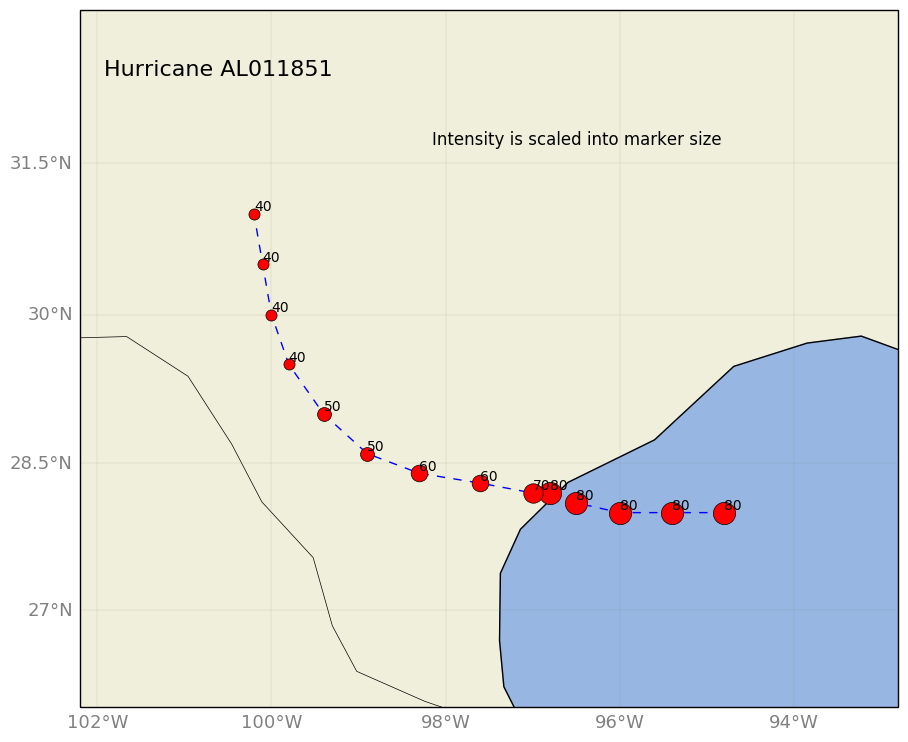

In [1]:
# YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy  #coordinate reference system
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker


with open('hurdat2-1851-2015-070616.txt') as f:
    lines = f.readlines()
    
hurdat = {}
for line in lines:
    data = [x.strip() for x in line.split(',')]
    if len(data)==4:
        name = data[0]
        hurdat[name] = {}
        hurdat[name]['lon'] = []
        hurdat[name]['lat'] = []
        hurdat[name]['intensity'] = []
    else:
        hurdat[name]['lat'].append(float(data[4][:-1]))
        hurdat[name]['lon'].append(-float(data[5][:-1]))
        hurdat[name]['intensity'].append(float(data[6]))

fig = plt.figure(figsize=(16, 9))

lon=np.array(hurdat['AL011851']['lon'])
lat=np.array(hurdat['AL011851']['lat'])
intensity=np.array(hurdat['AL011851']['intensity'])
sizes=8+8*(intensity-intensity.min())/(intensity.max()-intensity.min())

# ax = plt.axes(projection=ccrs.Mercator(central_longitude=np.mean(lon),central_latitude=np.mean(lat)))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=np.mean(lon)))
ax.set_extent([lon.min()-2, lon.max()+2, lat.min()-2, lat.max()+2], ccrs.PlateCarree())

# add geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)

gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# ax.plot(lon, lat, marker='o', markersize=sizes, markerfacecolor='red', linestyle='dashed', transform=ccrs.PlateCarree()) 
plt.plot(lon, lat, linestyle='dashed',color='b', transform=ccrs.PlateCarree())
for i in range (0, len(lon)):
    plt.plot(lon[i], lat[i], linestyle="None", 
             marker="o", markersize=sizes[i], markerfacecolor="red",
             transform=ccrs.PlateCarree())
    


# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlocator = mticker.FixedLocator([lon.min()-5, (lon.min()+lon.max())*0.5, lon.max()+5])  # control where the ticks are
gl.xlabel_style = {'size': 13, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'size': 13, 'color': 'gray'}  # 'weight': 'bold'
gl.xlabels_top = False  # turn off labels where you don't want them
gl.ylabels_right = False



# lat_cll = lat[0]
# lon_cll = -(96.0 + 18.0/60.0 + 52.0/3600.0)
# ax.plot(lon_cll, lat_cll, '*', color='maroon', ms=20, transform=ccrs.PlateCarree())
for i in range (0, len(lon)):
    ax.text(lon[i], lat[i],int(intensity[i]), horizontalalignment='left',
            verticalalignment='bottom',
            transform=ccrs.PlateCarree(),fontsize=10)
    
ax.text(0.03, 0.9, 'Hurricane AL011851', horizontalalignment='left',
        verticalalignment='bottom',
        color='black', fontsize=16,transform=ax.transAxes)

ax.text(0.43, 0.8, 'Intensity is scaled into marker size', horizontalalignment='left',
        verticalalignment='bottom',
        color='black', fontsize=12,transform=ax.transAxes)


In [ ]:
# YOUR CODE HERE
# 画台风经过 plume 区域（sss<35.8）:台风路径上，每一个点的盐度若小于35.8，并且在0-20n, 40-80w，就属于经过。
# 然后算出该台风的等级，每一个点的移动速度，每一个点的加强速率。
# 从1980-2015

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy  #coordinate reference system
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker


with open('hurdat2-1851-2015-070616.txt') as f:
    lines = f.readlines()
    
hurdat = {}
for line in lines:
    data = [x.strip() for x in line.split(',')]
    if len(data)==4:
        name = data[0]
        hurdat[name] = {}
        hurdat[name]['lon'] = []
        hurdat[name]['lat'] = []
        hurdat[name]['intensity'] = []
    else:
        hurdat[name]['lat'].append(float(data[4][:-1]))
        hurdat[name]['lon'].append(-float(data[5][:-1]))
        hurdat[name]['intensity'].append(float(data[6]))

        
        
fig = plt.figure(figsize=(16, 9))

lon=np.array(hurdat['AL011851']['lon'])
lat=np.array(hurdat['AL011851']['lat'])
intensity=np.array(hurdat['AL011851']['intensity'])
sizes=8+8*(intensity-intensity.min())/(intensity.max()-intensity.min())

# ax = plt.axes(projection=ccrs.Mercator(central_longitude=np.mean(lon),central_latitude=np.mean(lat)))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=np.mean(lon)))
ax.set_extent([lon.min()-2, lon.max()+2, lat.min()-2, lat.max()+2], ccrs.PlateCarree())

# add geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)

gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# ax.plot(lon, lat, marker='o', markersize=sizes, markerfacecolor='red', linestyle='dashed', transform=ccrs.PlateCarree()) 
plt.plot(lon, lat, linestyle='dashed',color='b', transform=ccrs.PlateCarree())
for i in range (0, len(lon)):
    plt.plot(lon[i], lat[i], linestyle="None", 
             marker="o", markersize=sizes[i], markerfacecolor="red",
             transform=ccrs.PlateCarree())
    


# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlocator = mticker.FixedLocator([lon.min()-5, (lon.min()+lon.max())*0.5, lon.max()+5])  # control where the ticks are
gl.xlabel_style = {'size': 13, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'size': 13, 'color': 'gray'}  # 'weight': 'bold'
gl.xlabels_top = False  # turn off labels where you don't want them
gl.ylabels_right = False



# lat_cll = lat[0]
# lon_cll = -(96.0 + 18.0/60.0 + 52.0/3600.0)
# ax.plot(lon_cll, lat_cll, '*', color='maroon', ms=20, transform=ccrs.PlateCarree())
for i in range (0, len(lon)):
    ax.text(lon[i], lat[i],int(intensity[i]), horizontalalignment='left',
            verticalalignment='bottom',
            transform=ccrs.PlateCarree(),fontsize=10)
    
ax.text(0.03, 0.9, 'Hurricane AL011851', horizontalalignment='left',
        verticalalignment='bottom',
        color='black', fontsize=16,transform=ax.transAxes)

ax.text(0.43, 0.8, 'Intensity is scaled into marker size', horizontalalignment='left',
        verticalalignment='bottom',
        color='black', fontsize=12,transform=ax.transAxes)
